This dataset contains a list of video games with sales greater than 100,000 copies.

Fields include:

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

Đọc file và lưu vào 1 DataFrame

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

# Load data from CSV file
df = pd.read_csv('vgsales.csv')


Ta có thông tin của DataFrame như sau

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Các data đã được đọc chính xác và đây là ví dụ 3 data đầu tiên của file:

In [3]:
df.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


Ta sẽ bắt đầu khảo sát data như sau:

** Top 7 nhà phát hành game nhiều nhất **

In [4]:
df['Publisher'].value_counts().head(7)

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
THQ                              715
Nintendo                         703
Name: Publisher, dtype: int64

** Top 5 thể loại game phát hành nhiều nhất: **

In [6]:
df['Genre'].value_counts().head(5)

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Name: Genre, dtype: int64

Nhận xét: <br>
    + Electronic Arts là nhà phát triển game có số lượng game nhiều hơn hẳn các nhà phát triển game khác. <br>
    + Thể loại game được phát hành nhiều nhất là Action Game

Các nền tảng game:

In [7]:
df['Platform'].nunique()

31

In [8]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Top 5 nền tảng phát hành bán chạy game nhất:

In [9]:
Platform_GB_Sales = df.groupby('Platform')['Global_Sales'].sum()

Platform_GB_Sales.sort_values(ascending=False).head(5)

Platform
PS2     1255.64
X360     979.96
PS3      957.84
Wii      926.71
DS       822.49
Name: Global_Sales, dtype: float64

Sơ đồ game bán trên thế giới theo nền tảng phát hành

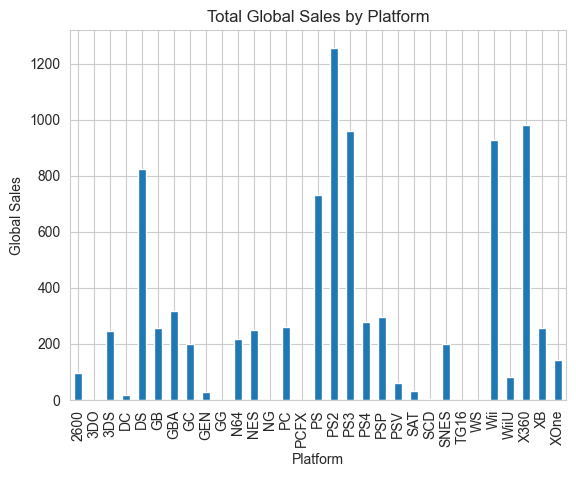

In [10]:
Platform_GB_Sales.plot(kind='bar')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.title('Total Global Sales by Platform')
plt.show()

Tổng số game bán ra trên toàn cầu có số lượng lớn nhất ở nền tảng PS2, tiếp đến là X360 và PS3. <br>
Những nền tảng 3DO, GG, PCFX,... vì số lượng bán ra trên toàn cầu quá ít nên không thể khảo sát trên biểu đồ này được

Sơ đồ thể hiện số lượng game phát hành từ năm 1980 đến năm 2016:

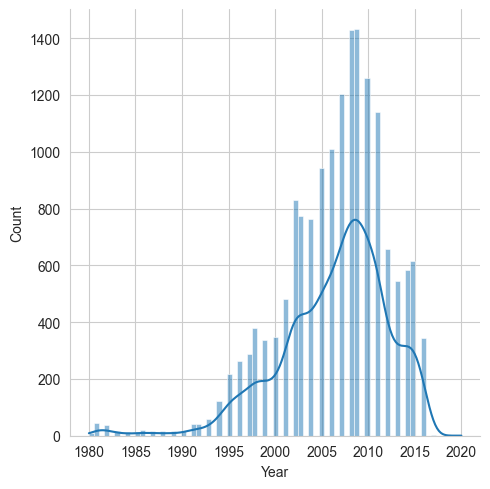

In [17]:
# Create a distribution plot
sns.displot(df['Year'], kde=True)

Nhận xét số lượng game phát hành từ năm 1980 đến năm 2016: <br>
    + Số game phát hành có sự tăng dần từ năm 1993 và cao nhất vào năm 2009 <br>
    + Đến năm 2015 số lượng game phát hành giảm dần, vì người thu thập dữ liệu cập nhật giảm dầm vào nắm 2016

(0.0, 10.0)

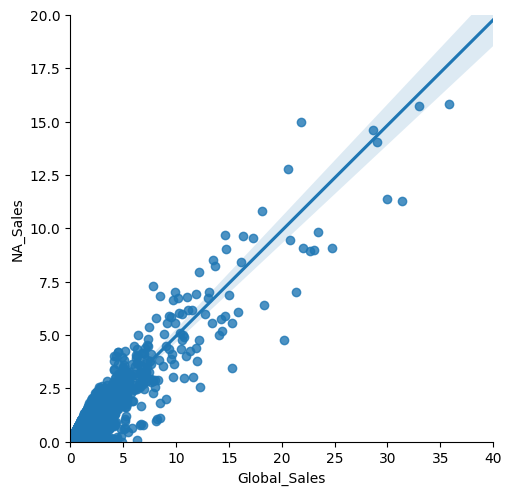

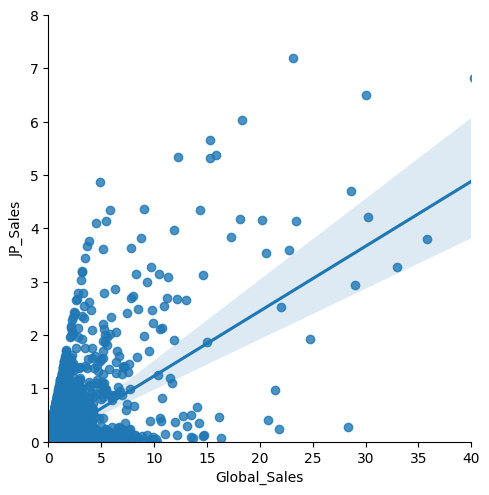

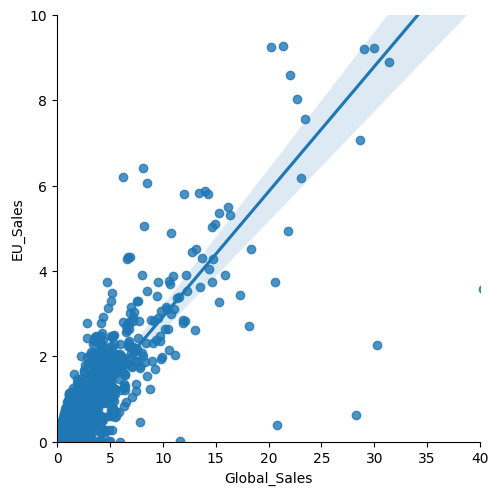

In [4]:
# Create a linear model plot
sns.lmplot(x='Global_Sales', y='NA_Sales', data=data)

# Set the limits of the x and y axes
plt.xlim(0, 40)
plt.ylim(0, 20)

sns.lmplot(x='Global_Sales', y='JP_Sales', data=data)

# Set the limits of the x and y axes
plt.xlim(0, 40)
plt.ylim(0, 8)

sns.lmplot(x='Global_Sales', y='EU_Sales', data=data)

# # Set the limits of the x and y axes
plt.xlim(0, 40)
plt.ylim(0, 10)

Nhận xét:<br>

+ Ta thấy sales trên toàn cầu phụ thuộc vào sales của NA khá nhiều. <br>
+ Ở Japan, thì có những game bán chạy ở thị trường JP nhưng lại không bán chạy ở thị trường toàn cầu và ngược lại. <br>
+ Sales trên toàn cầu cũng phụ thuộc vào sales của EU nhưng lại không phụ thuộc bằng NA.

** Biểu đồ tròn thể hiện sales của các khu vực ** 

([<matplotlib.patches.Wedge at 0x149bc1199c8>,
 [Text(0.025182011903636725, 1.0997117196231407, 'North America'),
  Text(-0.7569319047119789, -0.7981566836336684, 'Europe'),
  Text(0.5784223346379734, -0.9356428820826654, 'Japan'),
  Text(1.0568272053548213, -0.30514956664219334, 'Others')],
 [Text(0.013735642856529123, 0.5998427561580767, '49.3%'),
  Text(-0.4128719480247158, -0.43535819107291, '27.3%'),
  Text(0.3155030916207127, -0.5103506629541811, '14.5%'),
  Text(0.5764512029208116, -0.16644521816846908, '8.9%')])

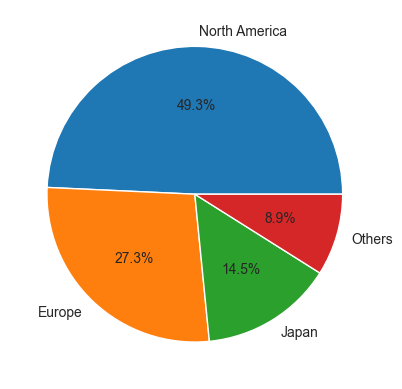

In [100]:
NA_Sales = df["NA_Sales"].sum() 
EU_Sales = df["EU_Sales"].sum()
JP_Sales = df["JP_Sales"].sum()
Other_Sales = df["Other_Sales"].sum()

Global_Sales = df["Global_Sales"].sum()

pct_NA_GB = (NA_Sales / Global_Sales) * 100
pct_EU_GB = (EU_Sales / Global_Sales) * 100
pct_JP_GB = (JP_Sales / Global_Sales) * 100
pct_OT_GB = (Other_Sales / Global_Sales) * 100

pct = [pct_NA_GB, pct_EU_GB, pct_JP_GB, pct_OT_GB]
labels = 'North America', 'Europe', 'Japan', 'Others'


plt.pie(pct, labels=labels, autopct='%1.1f%%')


Nhận xét: <br>
+ Số lượng game bán ra ở khu vực Bắc Mĩ có tỉ lệ cao nhất <br>
+ Xếp hạng 2 về số lượng game bán ra là khu vực Châu Âu, và cuối cùng là Nhật Bản 

<AxesSubplot:xlabel='Year', ylabel='Genre'>

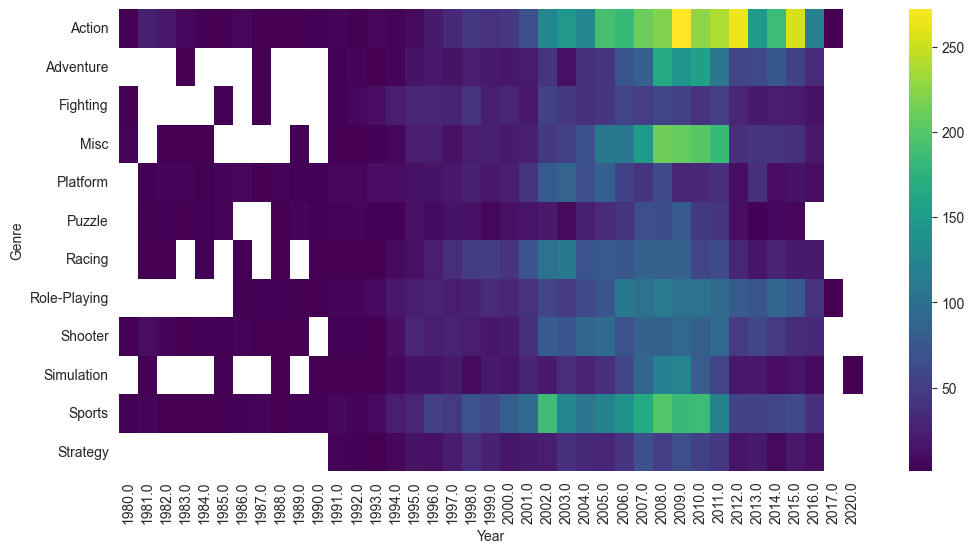

In [14]:
year_genre = df.groupby(by=['Genre','Year']).count()['Publisher'].unstack()
plt.figure(figsize=(12,6))
sns.heatmap(year_genre,cmap='viridis')

Nhận xét:<br>
+ Thể loại game Action bắt đầu xuất bản ra nhiều từ năm 2001 và đến đỉnh điểm vào năm 2009
+ Thể loại game Sports cũng bắt đầu xuất bản nhiều từ 1998
+ Các thể loại game khác phần lớn xuất bản đều nhau
+ Số lượng game xuấn bản cao từ năm 2001 đến năm 2012